https://scientificallysound.org/2016/08/11/python-analysing-emg-signals-part-1/

Elétromiografia é uma técnica usada para estudos clinicos e experimentais para entender e analisar os sinais elétricos produzidos pelos músculos.
## O que é o EMG?



Reference
Konrad P (2006) The ABC of EMG – A practical introduction to kinesiological electromyography. Noraxon USA Inc.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
# URL pro raw csv que ta no git
url = './datasets/oficial/mov_bom/david/myo-movimento-david-2019-06-14 10:20:51-.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset = pd.read_csv('./datasets/oficial/mov_bom/david/myo-movimento-david-2019-06-14 10:20:51-.csv')
sig = list() # lista contendo os 8 sinais de emg
for i in range(8):
    # ax = np.linspace(0, 500, 500, endpoint=True)
    # plt.title("Channel "+str(1))
    # plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    sig.append(list(Dataset.get(column)))


## (1) removendo a média do EMG

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'EMG (a.u.)')

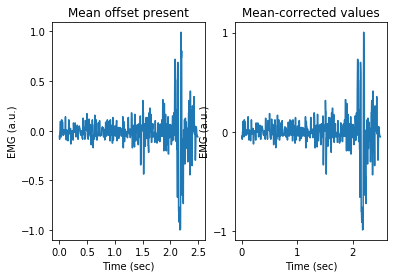

In [8]:
# 500 amostras a uma frequencia de 200hz
# tempo = 500/200 = 2,5 segundos
# intervalo entre as amostras = 2.5/500 = 0,005

time = np.arange(0, 2.5, 0.005)

emg = np.array(sig[0])
emg = emg/max(abs(emg))
# process EMG signal: remove mean
emg_correctmean = emg - np.mean(emg)
# plot comparison of EMG with offset vs mean-corrected values

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Mean offset present')
plt.plot(time, emg)
plt.locator_params(axis='x', nbins=8)
plt.locator_params(axis='y', nbins=8)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Mean-corrected values')
plt.plot(time, emg_correctmean)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')


## (2) Filter EMG signal

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'EMG (a.u.)')

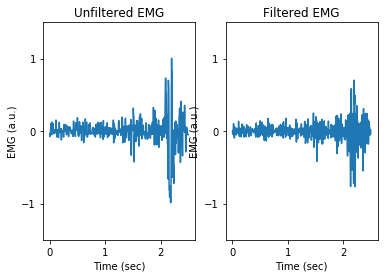

In [9]:
import scipy as sp
from scipy import signal

# create bandpass filter for EMG
high = 20/(200/2)
low = 99/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean)

# plot comparison of unfiltered vs filtered mean-corrected EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unfiltered EMG')
plt.plot(time, emg_correctmean)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Filtered EMG')
plt.plot(time, emg_filtered)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

## (3) Rectify EMG signal


Text(0, 0.5, 'EMG (a.u.)')

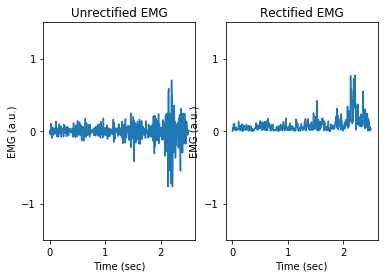

In [10]:
# process EMG signal: rectify
emg_rectified = abs(emg_filtered)

# plot comparison of unrectified vs rectified EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unrectified EMG')
plt.plot(time, emg_filtered)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Rectified EMG')
plt.plot(time, emg_rectified)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

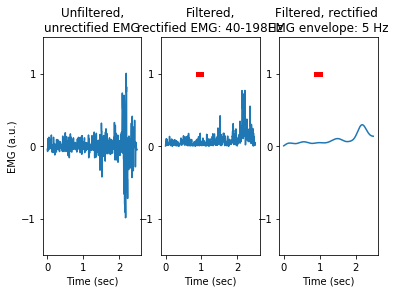

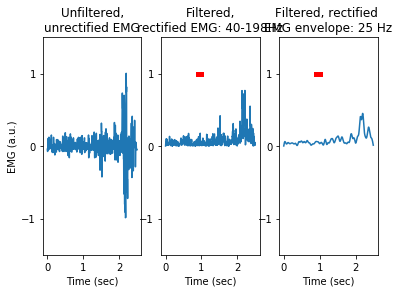

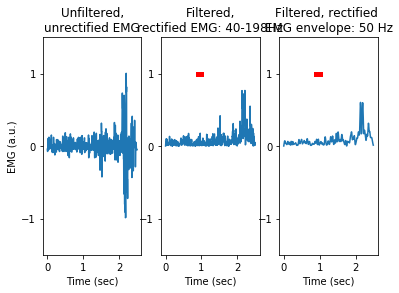

In [14]:
def filteremg(time, emg, low_pass=10, sfreq=200, high_band=20, low_band=99):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 3, 1)
    plt.subplot(1, 3, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(time, emg)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 3, 2)
    plt.subplot(1, 3, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(time, emg_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 3, 3)
    plt.subplot(1, 3, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    # show what different low pass filter cut-offs do
for i in [5, 25, 50]:
    filteremg(time, emg_correctmean, low_pass=i)
